In [1]:
#Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import warnings
import pickle
warnings.filterwarnings('ignore')

# Own modules and libraries
import estimators.v_information as v_information
import source.utils as ut
import source.pipes as op
import source.fairness as fm


# Plot
import seaborn as sns
sns.set_theme(style="darkgrid")

# Loading Data and Parameters

In [2]:
data_sets = {}

DIR_DATA = {
    'dutch_census': 'data/dutch_census/',
    'census_income':'data/census_income/',
    'compas': 'data/compas/',
    'credit_card': 'data/credit_card/'
}

data_names = {    
    'dutch_census': 'DC',
    'census_income':'CI',
    'compas': 'CR',
    'credit_card': 'CC'}

family_names={
    'sgd_lr':'Linear', 
    'mlp_one_layer': '1MLP', 
    'mlp_two_layer':'2MLP',
    'mlp_three_layer': '3MLP'
}

for data in DIR_DATA:
    with open (DIR_DATA[data]+data+'.pkl', 'rb') as f:
        dic = pickle.load(f)
    
    data_sets[data] = dic

In [6]:
result_train_size = pd.read_csv(f'size_training.csv')

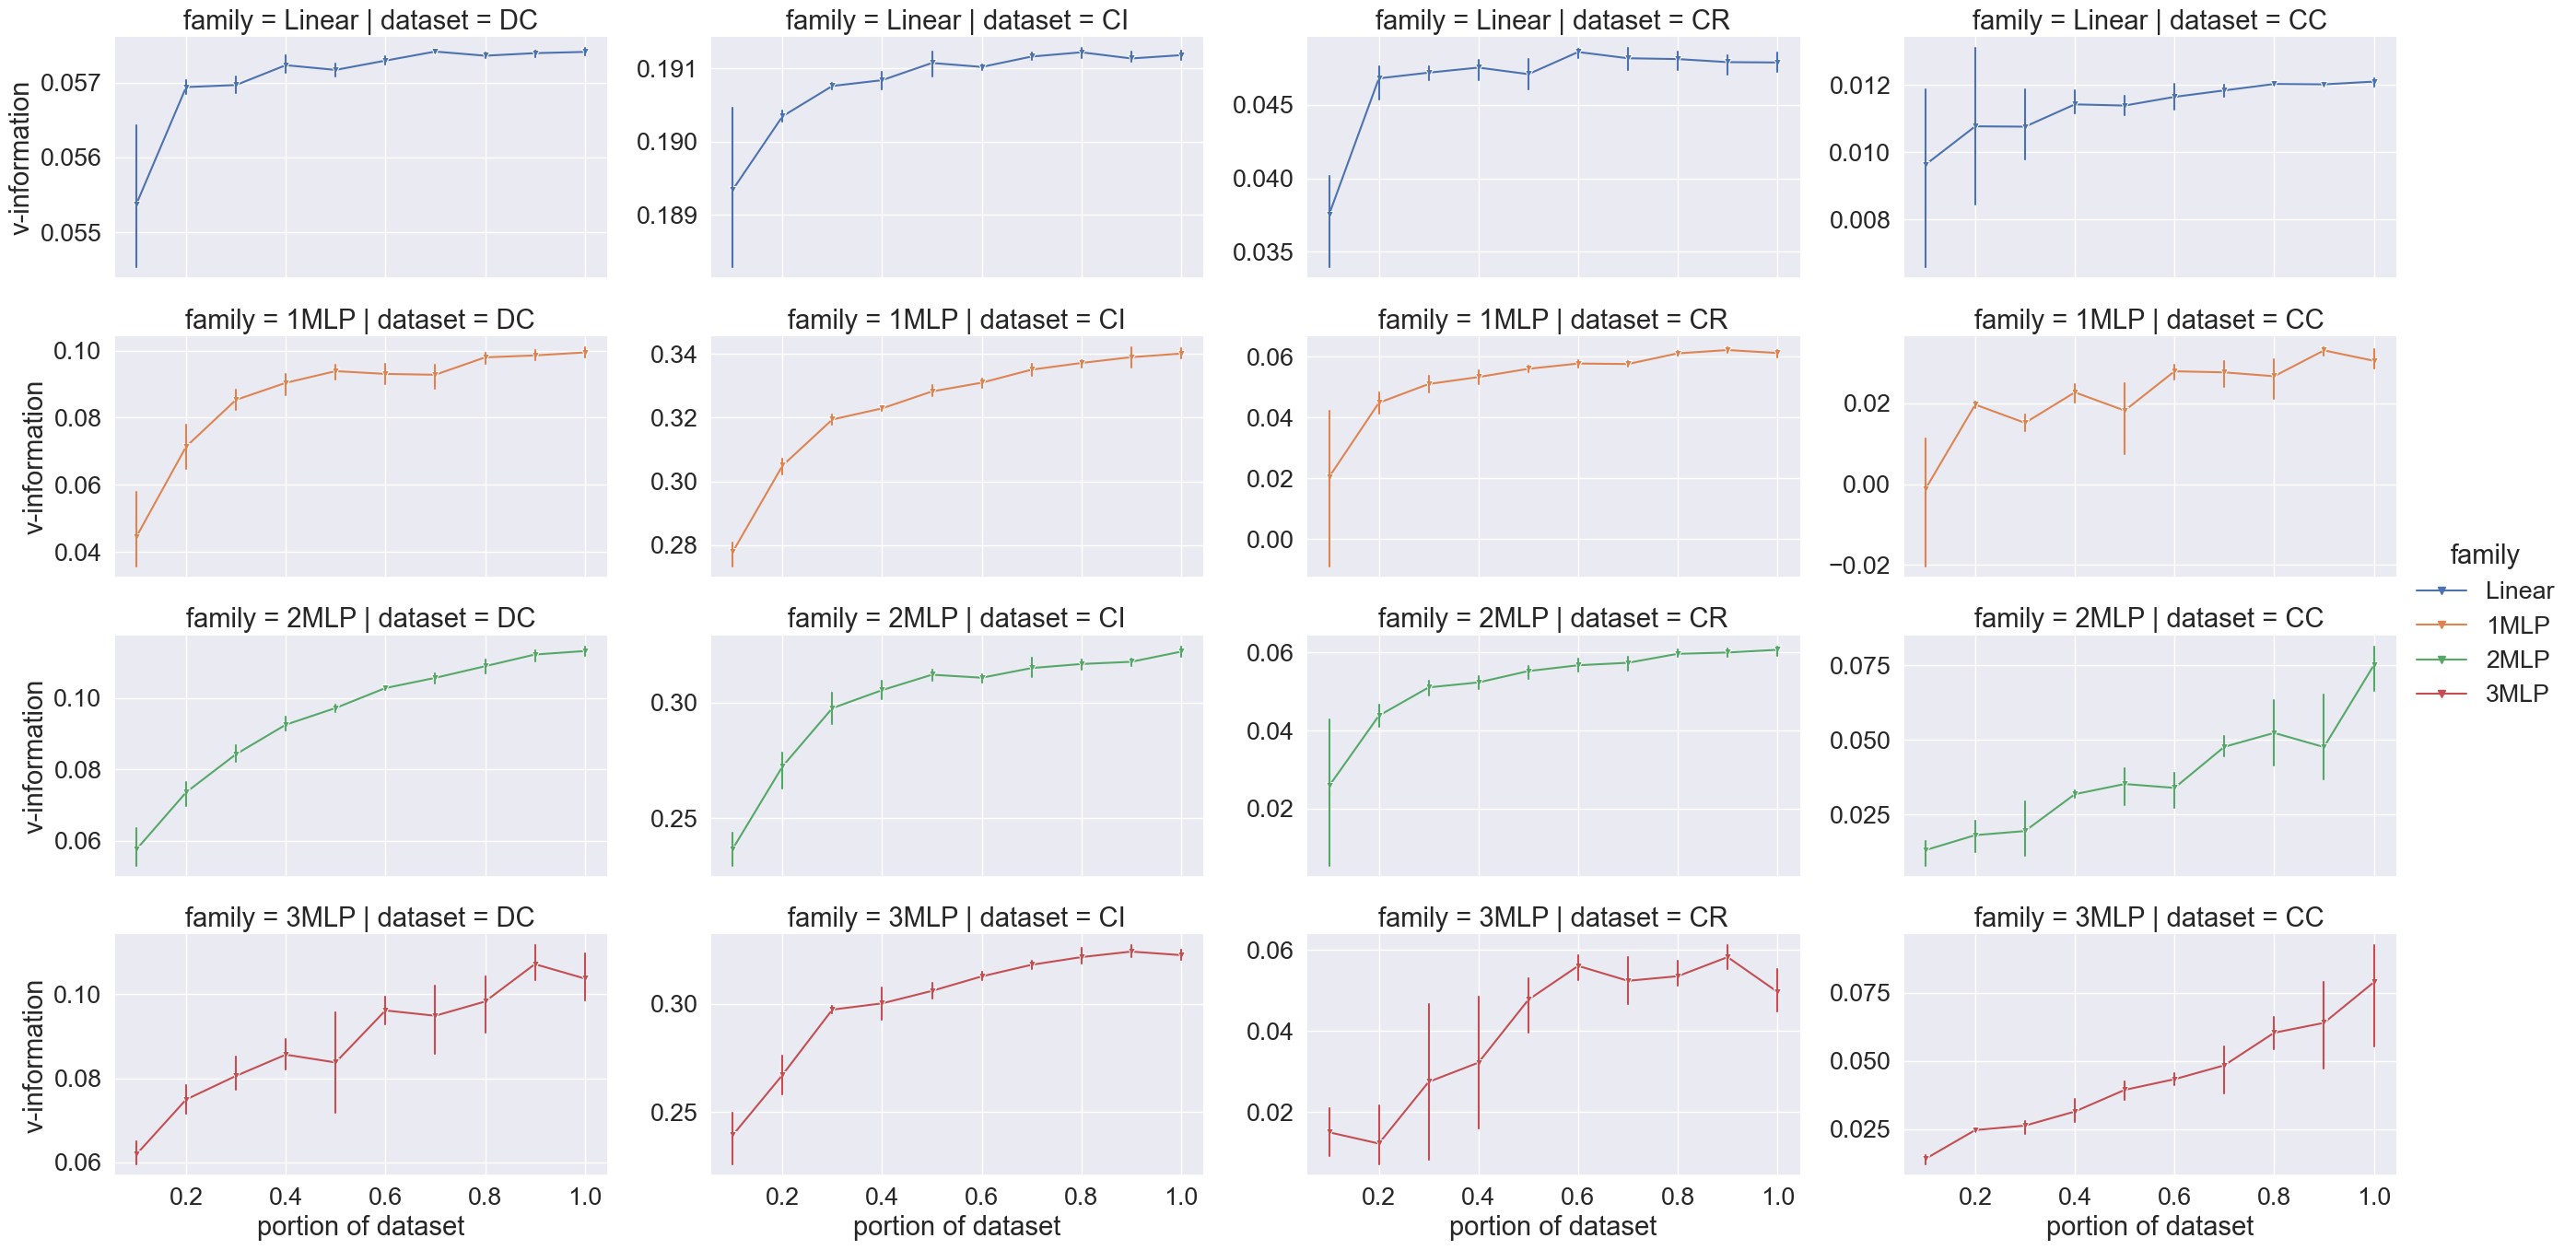

In [7]:
sns.set(font_scale=1.75)
result_train_size['dataset'] = result_train_size['dataset'].replace('dutch_census', 'DC').replace('census_income', 'CI').replace('german_data', 'GC').replace('compas', 'CR').replace('credit_card', 'CC')
result_train_size['family'] = result_train_size['family'].replace('sgd_lr', 'Linear').replace('mlp_one_layer', '1MLP').replace('mlp_two_layer', '2MLP').replace('mlp_three_layer', '3MLP')
result_train_size['portion'] = result_train_size['portion']/100
result_train_size.columns = ['dataset', 'family', 'scenario', 'portion of dataset', 'v-information']
sns.relplot(data=result_train_size, 
            x='portion of dataset',
            y='v-information',
            hue='family',
            col='dataset',
            row='family',
            kind='line',
            marker='v',
            err_style="bars",
            height=3.5, aspect=1.9, 
            facet_kws=dict(sharey=False))
plt.show()